# Generating Basic Networks

OpenPNM includes a variety of network generators. This notebook cover the use of just a few simple ones which is a good primer for for the rest of this tutorial series.

In [1]:
import openpnm as op

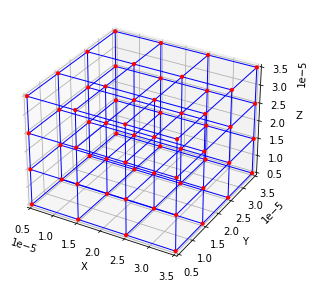

In [2]:
pn = op.network.Cubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

The above block uses the ``plot_connections`` and ``plot_coordinates`` method from the ``topotools`` module.  The options for visualization are explored in depth later in this tutorial series.

The shape and spacing of the network can both be altered:

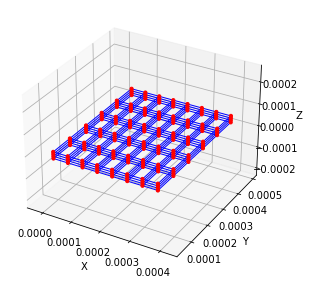

In [10]:
pn = op.network.Cubic(shape=[8, 6, 4], spacing=[5e-5, 9e-5, 1e-5])
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

Another useful and related network is the `Bravias` class, which allows `'fcc'` and `'bcc'` lattices.  These are very helpful for creating higher porosity networks since it jams extra pores into the interstial spaces:

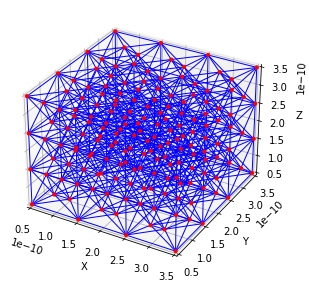

In [13]:
pn = op.network.Bravais(shape=[4, 4, 4], spacing=1e-5, mode='fcc')
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

Note that the 4x4x4 spacing refers to the number of corner sites, so it's basically the same size and shape as would be obtained using ``Cubic``, but it has the extra nodes placed between the corner sites.

OpenPNM can also handle random network with ease.  Below is the Voronoi tessellation of a set of random base points:

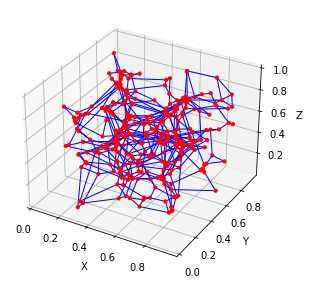

In [20]:
pn = op.network.Voronoi(shape=[1, 1, 1], points=100)
ax = op.topotools.plot_connections(pn)
ax = op.topotools.plot_coordinates(pn, ax=ax)

In all the above cases, the network generator returns a ``Network`` object, which is a Python `dict` containing Numpy `ndarrays`.  The contents of this dictionary can be seen using:

In [21]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Voronoi at 0x1745f9cba90>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  1  pore.coords                                                     347 / 347
  2  throat.conns                                                    618 / 618
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


The next chapter in this tutorial series will dive into the details of the data storage, but for now it is worth pointing out that all networks have `'pore.coords'`, which is an *Np-by-3* array of [x, y, z] coordinates of each pore center, and `'throat.conns'` is an *Nt-by-2* array of which pore lies on either end of each throat.